In [48]:
import torch
from torch.utils.data import Subset
import torchvision.transforms as transforms
from torchvision import datasets

In [71]:
def filter_labels(dataset, labels: set):
    target_inds = []
    for ind, target in enumerate(dataset.targets):
        for label in labels:
            if target == label:
                target_inds.append(ind)
                break;
    
    return Subset(dataset, target_inds)

target_labels = {0, 1}

In [72]:
# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
train_dataset = filter_labels(train_dataset, target_labels)
train_dataset.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [73]:
# loading test data
test_dataset = datasets.MNIST(root='./data', 
                               train=False, 
                               transform=transforms.ToTensor())
test_dataset = filter_labels(test_dataset, target_labels)
test_dataset.dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [83]:
print("number of training samples: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))

number of training samples: 12665
number of testing samples: 2115


In [74]:
print("First image shape:", train_dataset[0][0].shape)
print("First image label:", train_dataset[0][1])

First image shape: torch.Size([1, 28, 28])
First image label: 0


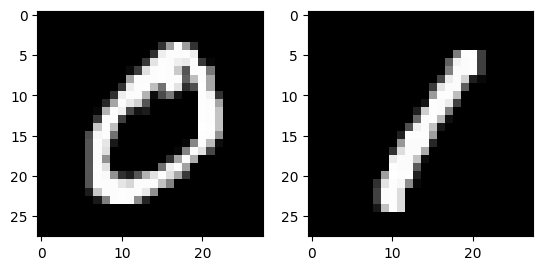

In [76]:
import matplotlib.pyplot as plt

img_0 = train_dataset[0][0].numpy().reshape(28, 28)
img_1 = train_dataset[1][0].numpy().reshape(28, 28)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img_0, cmap='gray')
ax2.imshow(img_1, cmap='gray')

plt.show()

In [111]:
from torch.utils.data import DataLoader
 
# load train and test data samples into dataloader, and Filter labels to 0 and 1
batch_size = 4
target_labels = {0, 1}

train_loader = DataLoader(
        dataset=train_dataset, 
        batch_size=batch_size, 
        shuffle=True
    )
test_loader = DataLoader(
        dataset=test_dataset, 
        batch_size=batch_size, 
        shuffle=False
    )

In [124]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    
    def forward(self, x: torch.Tensor):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

n_inputs = 28*28
n_outputs = 1
log_reg = LogisticRegression(n_inputs, n_outputs)

log_reg

LogisticRegression(
  (linear): Linear(in_features=784, out_features=1, bias=True)
)

In [125]:
# defining the optimizer
optimizer = torch.optim.SGD(log_reg.parameters(), lr=1e-5)
# defining Cross-Entropy loss
criterion = torch.nn.BCELoss()
 
epochs = 10
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        labels = labels.unsqueeze(-1).float()
        optimizer.zero_grad()
        outputs = log_reg(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        labels = labels.unsqueeze(-1).float()
        predicted = log_reg(images.view(-1, 28*28)).round()
        #_, predicted = torch.max(outputs.data, 1)
        correct += predicted.eq(labels).sum()
        #correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

print(Loss)

Epoch: 0. Loss: 0.6588744521141052. Accuracy: 77.54137115839244
Epoch: 1. Loss: 0.5275741219520569. Accuracy: 98.67612293144208
Epoch: 2. Loss: 0.5291756987571716. Accuracy: 99.76359338061465
Epoch: 3. Loss: 0.46759888529777527. Accuracy: 99.81087470449172
Epoch: 4. Loss: 0.36645710468292236. Accuracy: 99.81087470449172
Epoch: 5. Loss: 0.31323060393333435. Accuracy: 99.81087470449172
Epoch: 6. Loss: 0.38555774092674255. Accuracy: 99.81087470449172
Epoch: 7. Loss: 0.4948995113372803. Accuracy: 99.81087470449172
Epoch: 8. Loss: 0.16779296100139618. Accuracy: 99.81087470449172
Epoch: 9. Loss: 0.14803703129291534. Accuracy: 99.81087470449172
[0.6588744521141052, 0.5275741219520569, 0.5291756987571716, 0.46759888529777527, 0.36645710468292236, 0.31323060393333435, 0.38555774092674255, 0.4948995113372803, 0.16779296100139618, 0.14803703129291534]


In [126]:
img_0 = train_dataset[0][0]

log_reg(img_0.view(-1, 28*28))

tensor([[0.1497]], grad_fn=<SigmoidBackward0>)

In [127]:
img_1 = train_dataset[1][0]

log_reg(img_1.view(-1, 28*28))

tensor([[0.7220]], grad_fn=<SigmoidBackward0>)